In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("results.csv")

df.dropna()

,Name,Size,Category,Files,FilesSize,Time,Activities,Permissions,Services,Providers,...,Relda2,Relda2Time,EarmoClassification,KadabraClassification,LintClassification,ADoctorClassification,PaprikaClassification,Relda2Classification,FinalClassification,Label
0,com.tailscale.ipn,34.91,Connectivity,15,0.08,572.656413,1,9,6,1,...,3,33.672338,3,3,5,3,2,2,3.00,D
1,com.activitymanager,4.04,Development,104,0.88,419.499558,10,3,1,2,...,9,192.797085,5,5,5,2,3,1,3.50,C
2,com.gitlab.ardash.appleflinger.android,10.58,Games,73,0.40,170.756928,1,0,0,0,...,4,3.747890,3,3,5,3,4,1,3.17,D
3,com.simplemobiletools.gallery.pro,26.89,Graphics,1326,8.66,4494.748269,23,10,2,3,...,52,393.942530,1,5,5,1,5,1,3.00,D
4,it.danieleverducci.ojo,52.12,Multimedia,43,0.75,621.652638,2,2,0,1,...,13,320.046857,2,2,5,3,1,2,2.39,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,net.taler.cashier,3.63,Money,475,2.85,471.821383,1,3,0,1,...,0,28.779825,1,1,5,3,5,5,3.33,D
775,com.chesire.nekome,3.57,Internet,355,2.15,377.074332,2,6,4,0,...,0,129.587279,2,5,5,2,4,5,3.83,C
776,com.zhenxiang.superimage,144.97,Graphics,86,0.65,268.715500,2,8,4,2,...,0,148.265632,5,2,5,3,4,5,4.00,C
777,es.ideotec.workouttime,19.06,Sports and Health,195,0.74,77.354860,1,2,0,0,...,2,2.051780,5,1,5,2,4,3,3.33,D


<Axes: >

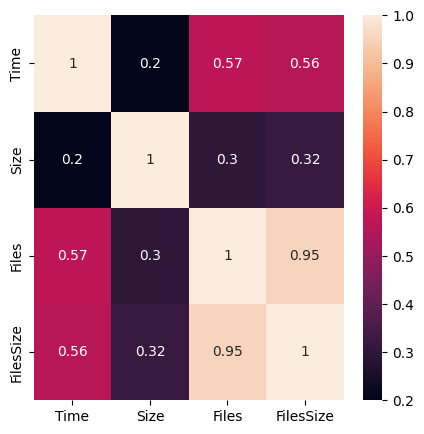

In [3]:
corrDf = df[["Time", "Size", "Files", "FilesSize"]]
corr_mat = corrDf.corr().round(2)

plt.figure(figsize=(5,5))
plot = sns.heatmap(corr_mat, annot=True)
plot

#plt.savefig("graphs/correlation_matrix.png")

[Text(0.5, 1.0, 'Size of apps by Category'), Text(0.5, 0, 'Size (MB)')]

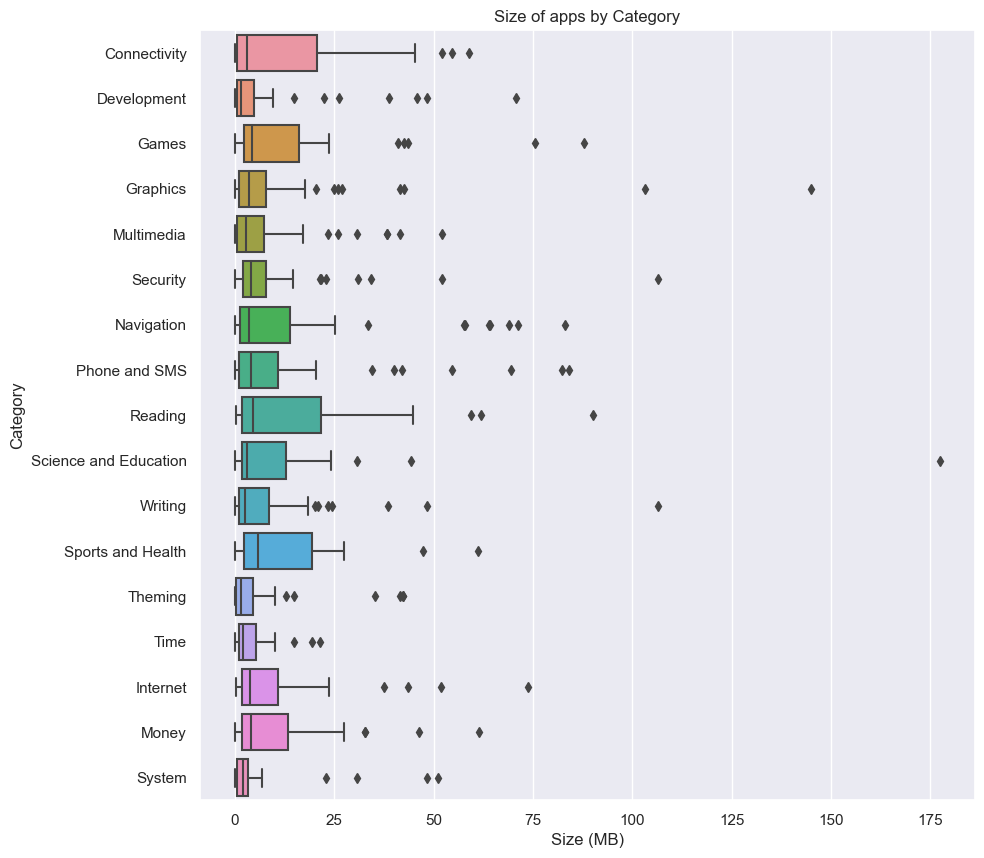

In [4]:
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plot = sns.boxplot(y=df["Category"], x=df["Size"]).set(title="Size of apps by Category", xlabel="Size (MB)")
plot

#plt.savefig("graphs/size_distribution_per_category.png", bbox_inches = 'tight')

[Text(0.5, 0, 'Time (s)')]

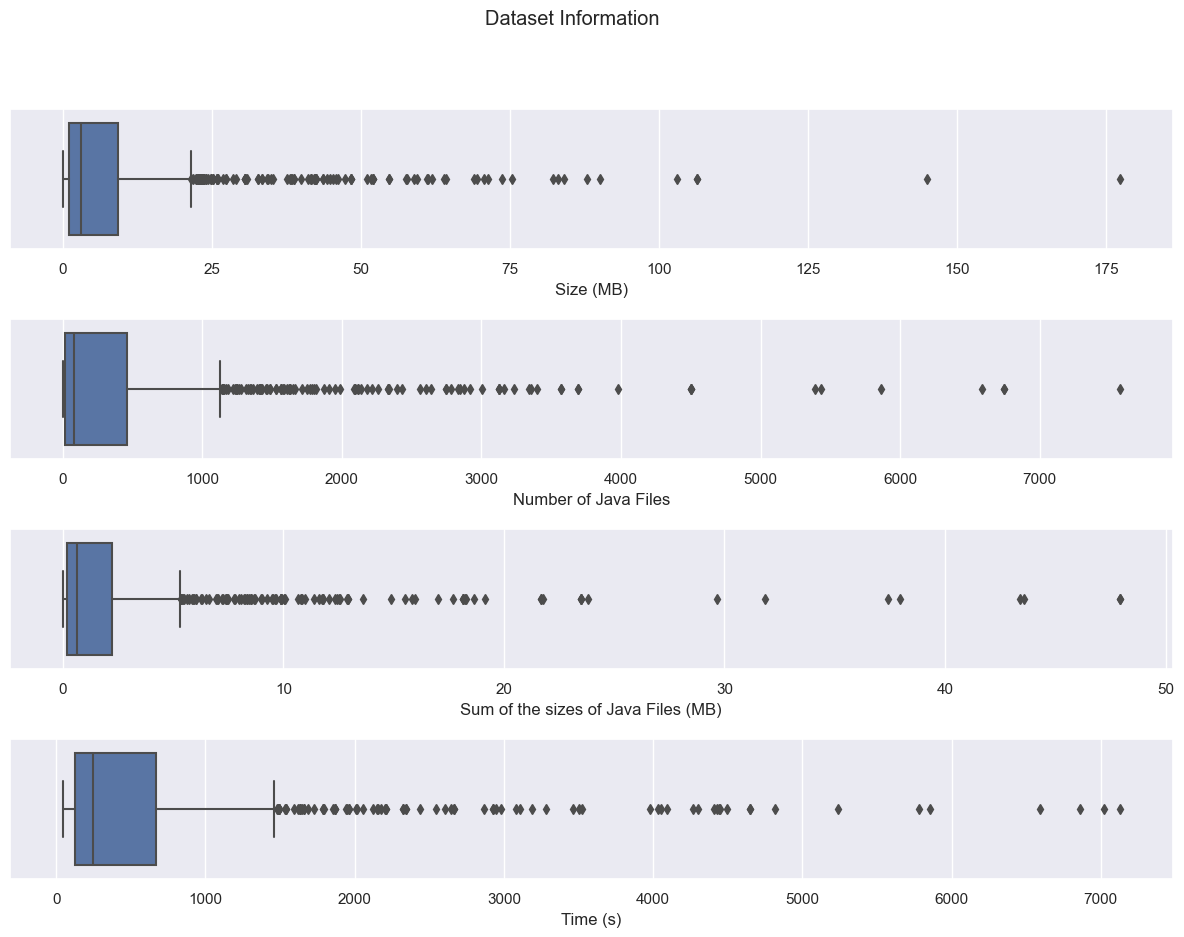

In [5]:
sns.set(font_scale=1)
fig, axes = plt.subplots(4, 1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle("Dataset Information")
sns.boxplot(ax=axes[0], x=df["Size"]).set(xlabel="Size (MB)")
sns.boxplot(ax=axes[1], x=df["Files"]).set(xlabel="Number of Java Files")
sns.boxplot(ax=axes[2], x=df["FilesSize"]).set(xlabel="Sum of the sizes of Java Files (MB)")
sns.boxplot(ax=axes[3], x=df["Time"]).set(xlabel="Time (s)")

#plt.savefig("graphs/dataset_info.png")

[Text(0.5, 0, 'Number of Apps')]

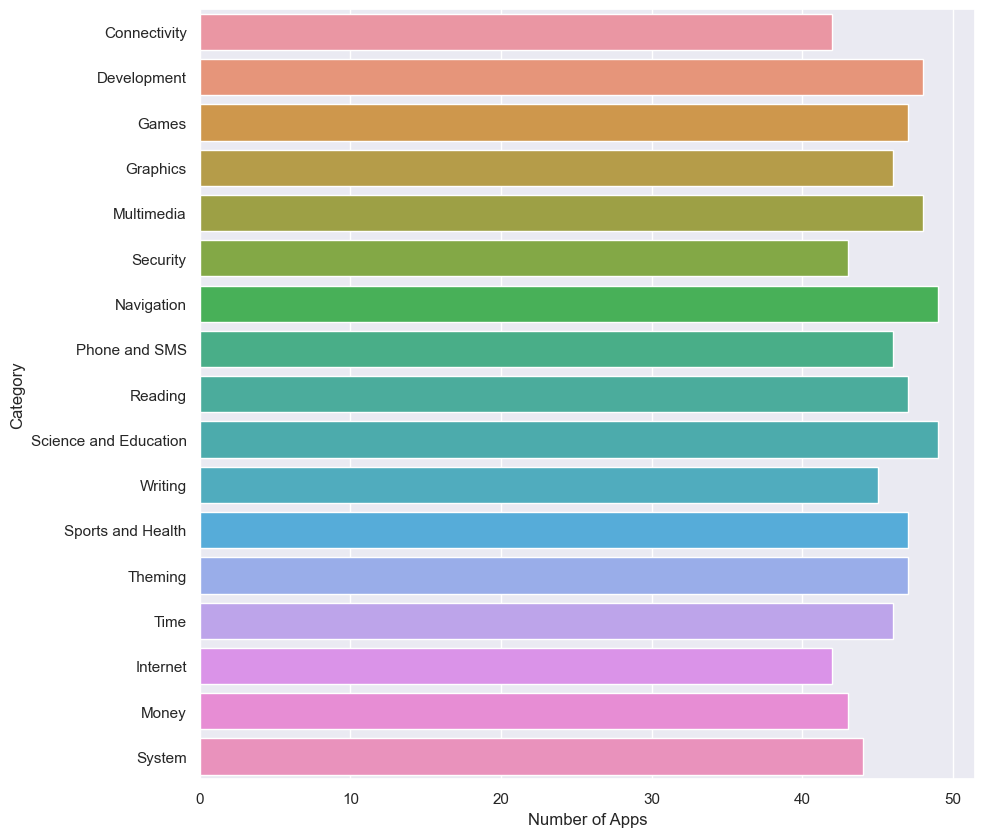

In [6]:
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.countplot(y=df["Category"]).set(xlabel="Number of Apps")

#plt.savefig("graphs/dataset_info_categories.png")

[Text(0.5, 0, 'Labels'), Text(0, 0.5, 'Number of Apps')]

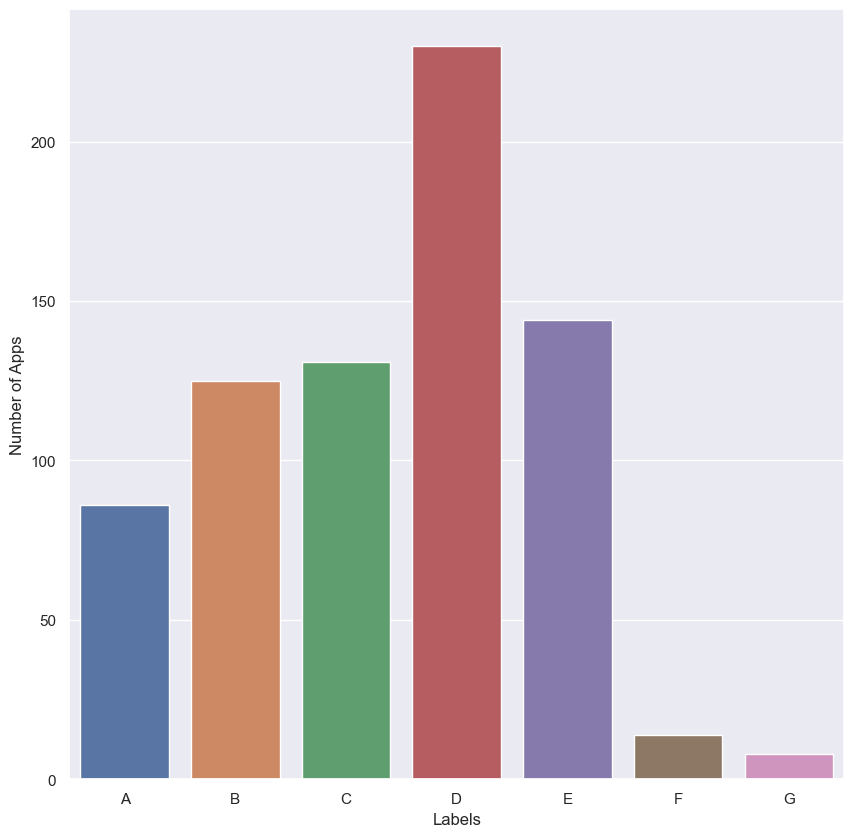

In [7]:
dfLabel = pd.read_csv("resultsLabel.csv")

dfLabel.dropna()

sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.countplot(x=dfLabel["Label"], order=["A","B","C","D","E","F","G"]).set(xlabel="Labels", ylabel="Number of Apps")

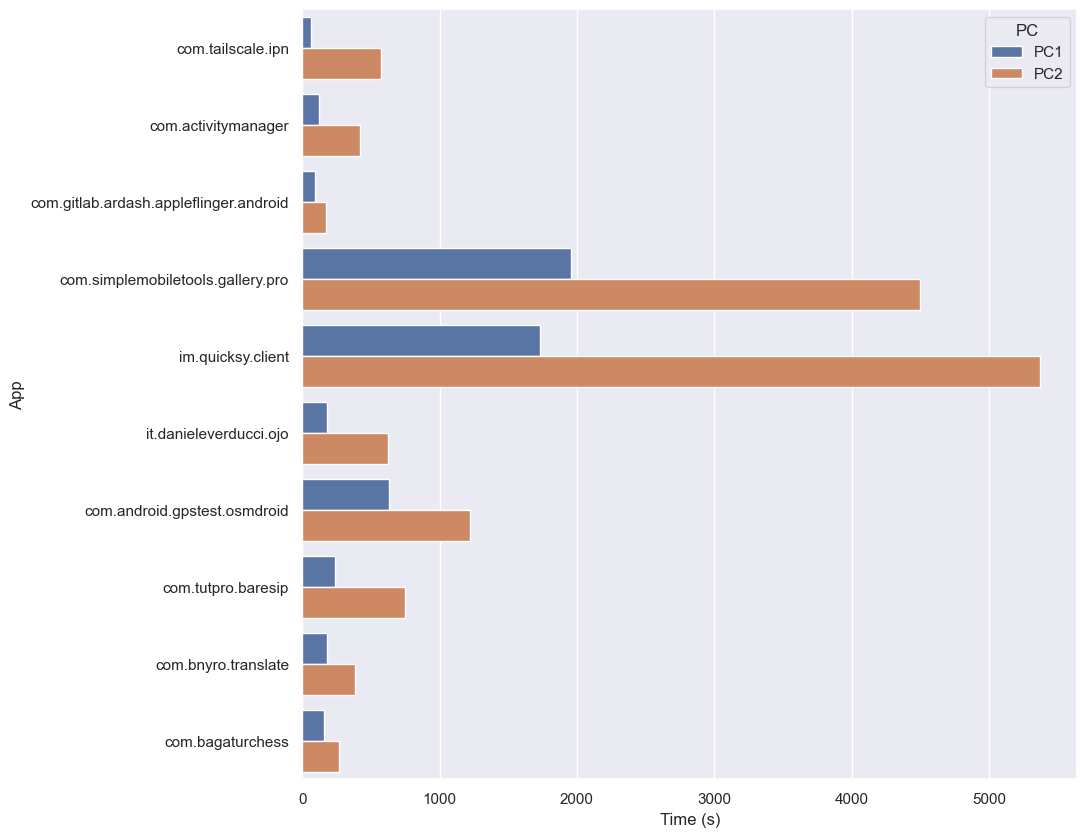

In [14]:
data = [
    {"PC": "PC1", "Name": "com.tailscale.ipn", "Time": 64.240181684494},
    {"PC": "PC1", "Name": "com.activitymanager", "Time": 122.379938840866},
    {"PC": "PC1", "Name": "com.gitlab.ardash.appleflinger.android", "Time": 89.2630422115325},
    {"PC": "PC1", "Name": "com.simplemobiletools.gallery.pro", "Time": 1955.09207463264},
    {"PC": "PC1", "Name": "im.quicksy.client", "Time": 1729.02744603157},
    {"PC": "PC1", "Name": "it.danieleverducci.ojo", "Time": 180.895118951797},
    {"PC": "PC1", "Name": "com.android.gpstest.osmdroid", "Time": 633.704128742218},
    {"PC": "PC1", "Name": "com.tutpro.baresip", "Time": 240.637559652328},
    {"PC": "PC1", "Name": "com.bnyro.translate", "Time": 180.24590063095},
    {"PC": "PC1", "Name": "com.bagaturchess", "Time": 160.957109928131},
    
    {"PC": "PC2", "Name": "com.tailscale.ipn", "Time": 572.65641260147},
    {"PC": "PC2", "Name": "com.activitymanager", "Time": 419.499557733535},
    {"PC": "PC2", "Name": "com.gitlab.ardash.appleflinger.android", "Time": 170.756927728652},
    {"PC": "PC2", "Name": "com.simplemobiletools.gallery.pro", "Time": 4494.74826860427},
    {"PC": "PC2", "Name": "im.quicksy.client", "Time": 5373.73156809806},
    {"PC": "PC2", "Name": "it.danieleverducci.ojo", "Time": 621.652637958526},
    {"PC": "PC2", "Name": "com.android.gpstest.osmdroid", "Time": 1220.86599612236},
    {"PC": "PC2", "Name": "com.tutpro.baresip", "Time": 749.190741539001},
    {"PC": "PC2", "Name": "com.bnyro.translate", "Time": 384.758833408355},
    {"PC": "PC2", "Name": "com.bagaturchess", "Time": 268.067852735519},
]

df = pd.DataFrame.from_dict(data)

sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.barplot(y=df["Name"], x=df["Time"], hue=df["PC"]).set(xlabel="Time (s)", ylabel="App")

plt.savefig("graphs/times_per_pc.png", bbox_inches = 'tight')

<Axes: xlabel='Earmo'>

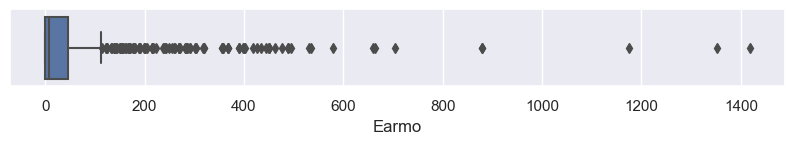

In [5]:
sns.set(font_scale=1)
plt.figure(figsize=(10,1))
plot = sns.boxplot(x=df["Earmo"])
plot

[Text(0.5, 0, 'Labels'), Text(0, 0.5, 'Number of Apps')]

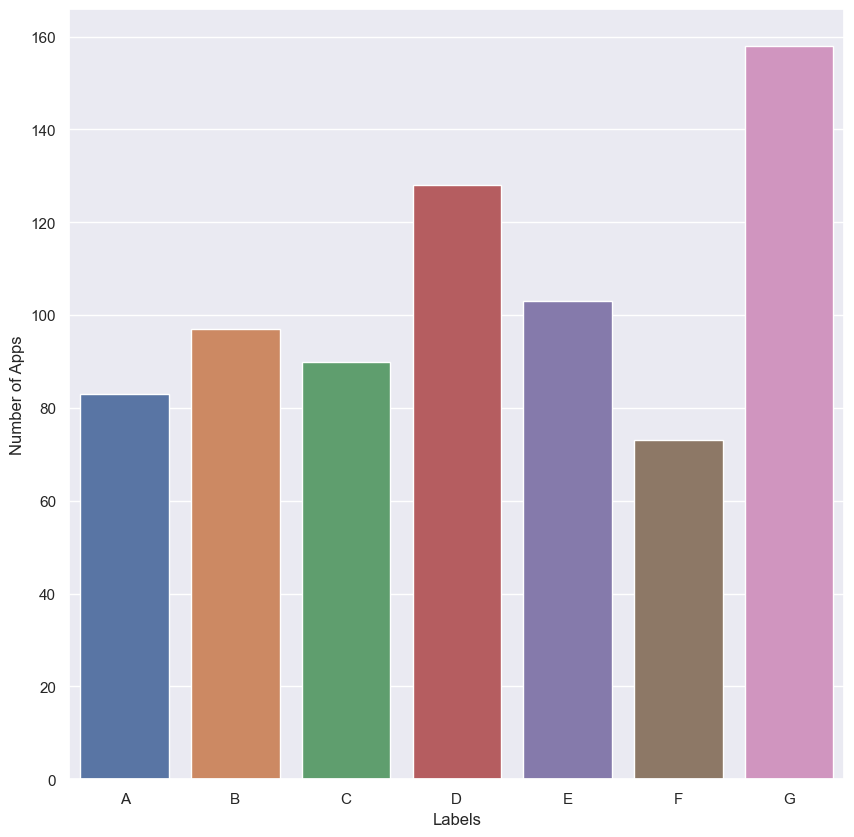

In [4]:
df = df.drop_duplicates('Name', keep='last')

df['Decile'] = pd.qcut(df['FinalClassification'], 7, labels=["G", "F", "E", "D", "C", "B", "A"])

sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.countplot(x=df["Decile"], order=["A","B","C","D","E","F","G"]).set(xlabel="Labels", ylabel="Number of Apps")